#importing data

In [266]:
import numpy as np
import scipy 
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_135603b9bbef42c29b99e39ba5cafef9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JFNbsKZYQf7YUm3_NiKVnYzK0sb_vZcafusu7bARxbgG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_135603b9bbef42c29b99e39ba5cafef9.get_object(Bucket='lifeexpectancyprediction-donotdelete-pr-cuoxi67ui8qej7',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [267]:
#data.info()

In [268]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [269]:
#!pip install pandas-profiling

In [270]:
#from pandas_profiling import ProfileReport
#profile= ProfileReport(data, title="EDA Report", explorative= True)

In [271]:
data = data.drop(['Country'], axis=1)
data.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [272]:
#We will now use the fillna() function to fill NA values in the dataframe.
new_data=data.fillna(data.mean())
new_data.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [273]:
#We will now convert the categorical variables in the Status column to binary vectors.
new_data.replace(to_replace=['Developing', 'Developed'],
           value= [0, 1], 
           inplace=True)
new_data.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#EDA

In [274]:
#sns.pairplot(new_data);

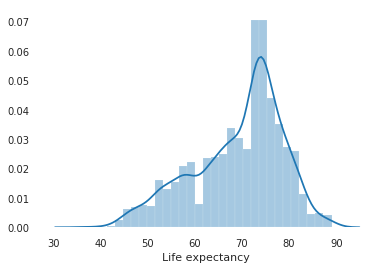

In [275]:
#Distance plot for Life Expectancy column
sns.distplot(new_data['Life expectancy ']);

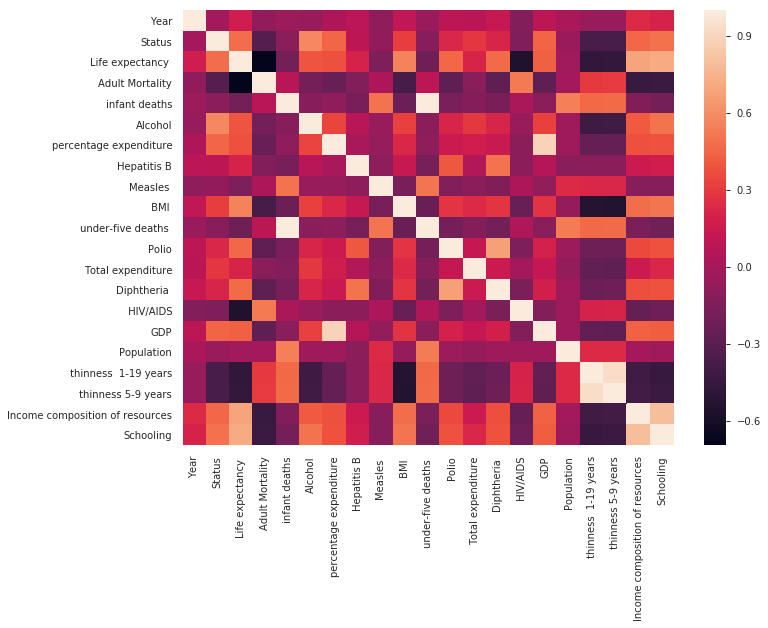

In [276]:
fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(ax=ax, data=new_data.corr());

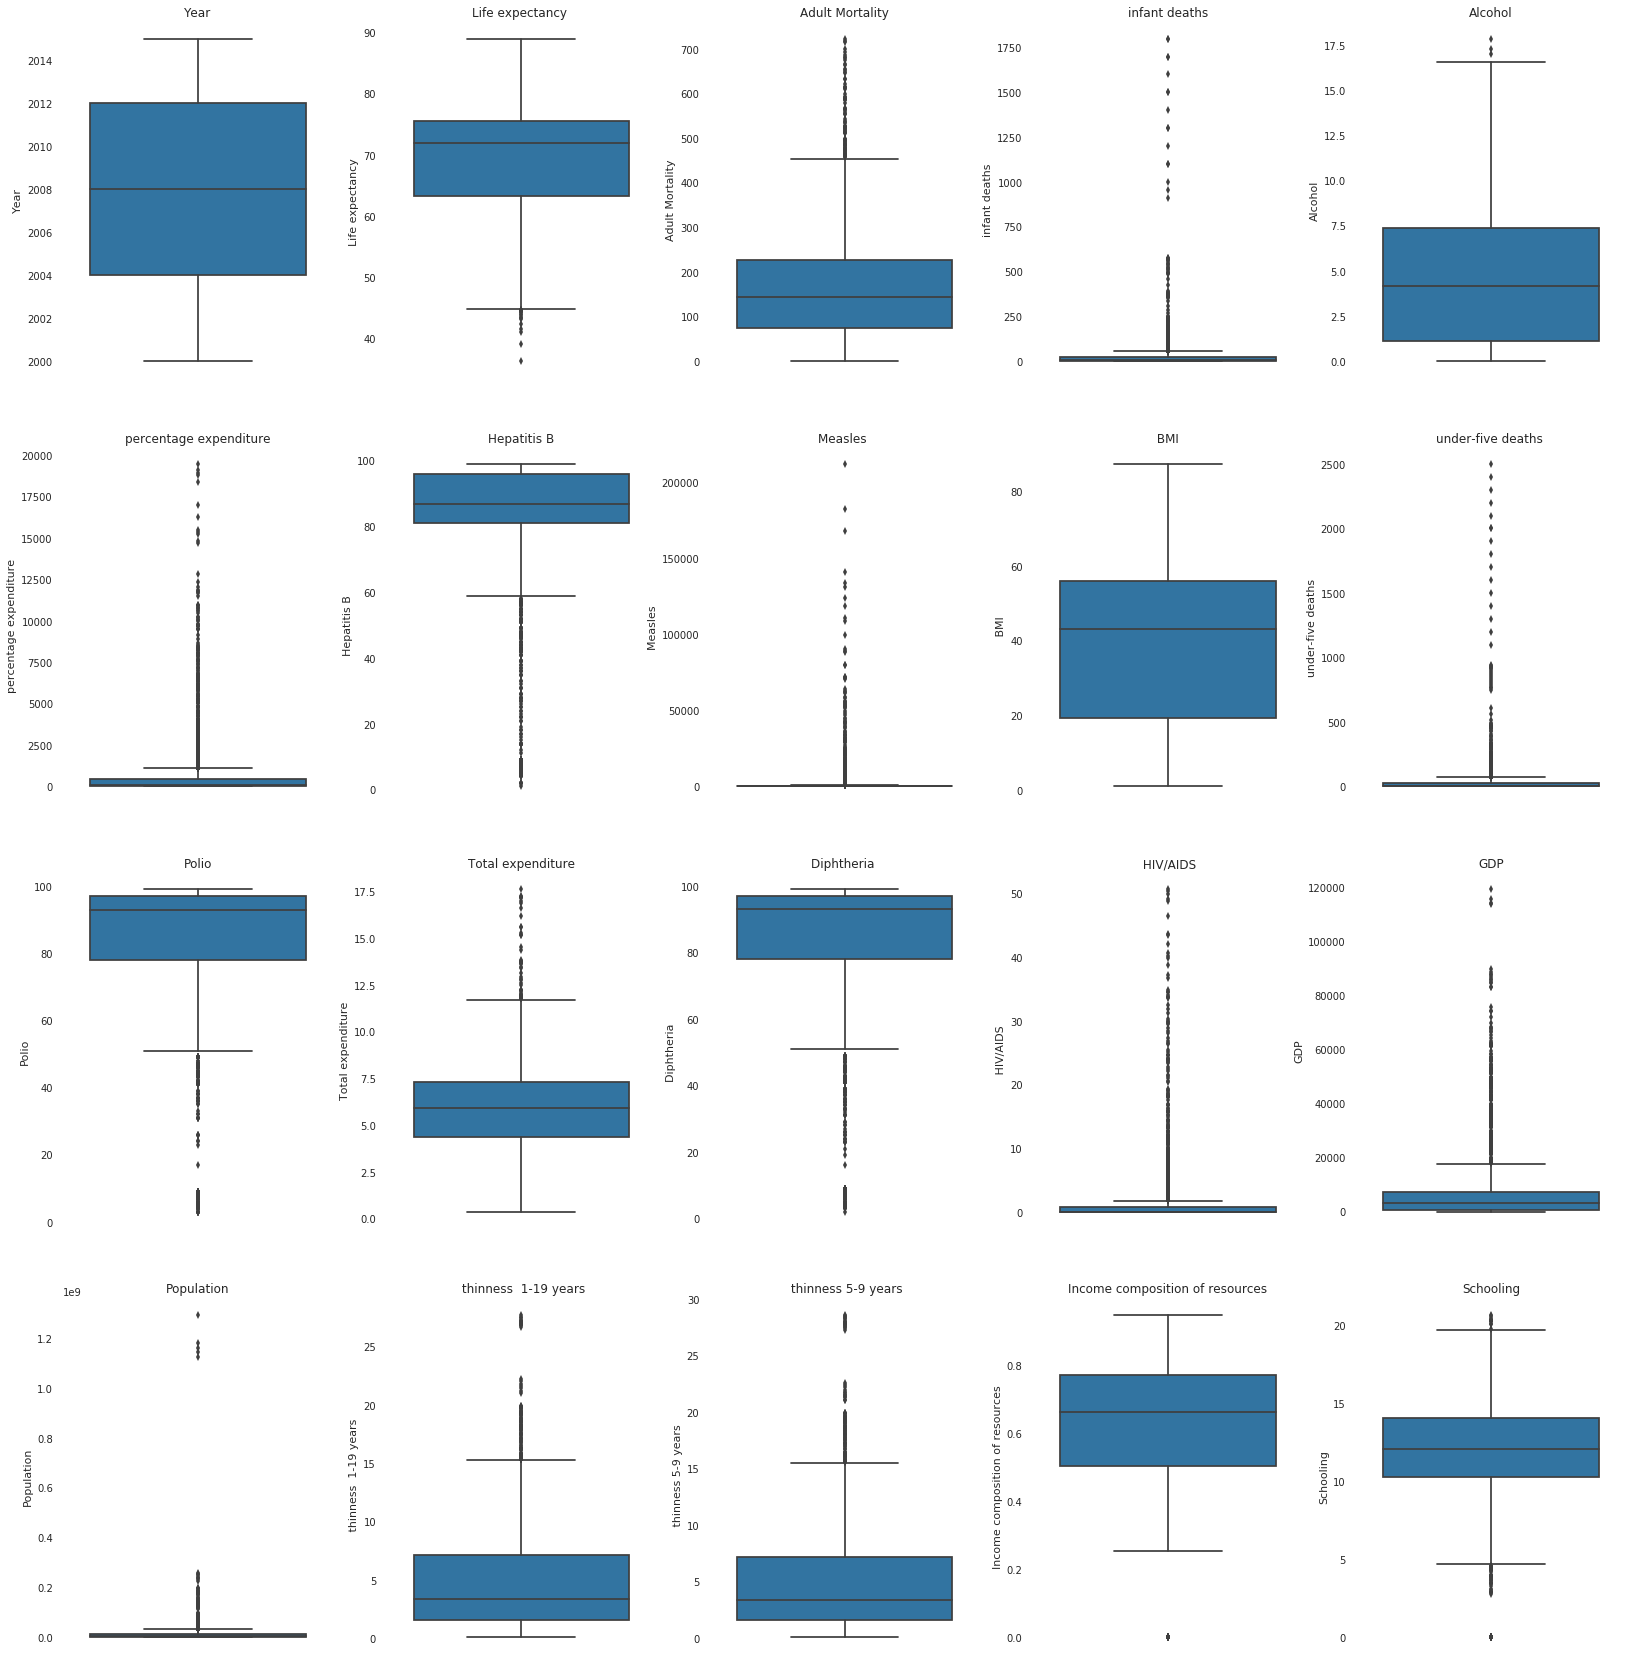

In [277]:
#Box Plots to visualize the outliers
columns = {1: 'Year', 2: 'Life expectancy ', 3: 'Adult Mortality', 4: 'infant deaths',
        5: 'Alcohol' , 6: 'percentage expenditure', 7: 'Hepatitis B',
       8: 'Measles ', 9: ' BMI ', 10: 'under-five deaths ', 11: 'Polio', 12: 'Total expenditure',
       13: 'Diphtheria ', 14: ' HIV/AIDS', 15: 'GDP', 16: 'Population',
       17: ' thinness  1-19 years', 18: ' thinness 5-9 years',
       19: 'Income composition of resources', 20: 'Schooling'}

plt.figure(figsize=(28, 30))

for i, column in columns.items():
                     plt.subplot(4,5,i)
                     sns.boxplot(new_data[column], orient='v')
                     plt.title(column)

plt.show()

#Training

In [278]:
X = new_data[['Year','Status', 'Adult Mortality', 'infant deaths',
         'Alcohol' ,  'percentage expenditure',  'Hepatitis B',
        'Measles ',  ' BMI ',  'under-five deaths ',  'Polio',  'Total expenditure',
        'Diphtheria ',  ' HIV/AIDS',  'GDP',  'Population',
        ' thinness  1-19 years',  ' thinness 5-9 years',
        'Income composition of resources',  'Schooling']]
y = new_data['Life expectancy ']
X.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [279]:
from sklearn.model_selection import train_test_split

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [281]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (1762, 20)
Training Labels Shape: (1762,)
Testing Features Shape: (1176, 20)
Testing Labels Shape: (1176,)


In [282]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 40, random_state = 50)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

In [283]:
rfpredictions= rf.predict(X_test)

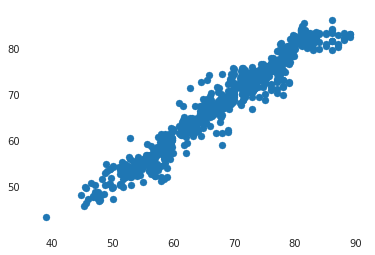

In [284]:
plt.scatter(y_test, rfpredictions);

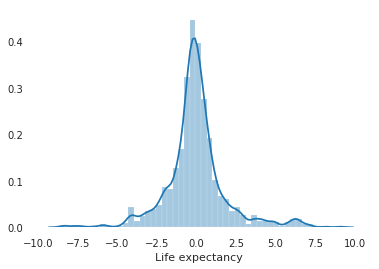

In [285]:
sns.distplot((y_test-rfpredictions),bins=50);

In [286]:

print("R² score for RandomForest Regression Model: ", end='')
print(r2_score(rfpredictions, y_test))

R² score for RandomForest Regression Model: 0.9535538509574479


In [287]:
#Evaluation metrics for RandomForest Regression Model
print('MAE:', mean_absolute_error(y_test, rfpredictions))
print('MSE:', mean_squared_error(y_test, rfpredictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rfpredictions)))

MAE: 1.2469383268163832
MSE: 3.7131731356887143
RMSE: 1.9269595573568


#with linear regression

In [288]:
!pip install watson-machine-learning-client

In [289]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [290]:
wml_credentials={
  "apikey": "J9IFlE64EiQLJbAv0pUgYoErarPZrX-U7u4JoO1IqoD8",
  "instance_id": "5dbfeebd-5453-443e-b161-09531de1188c",
  "url": "https://us-south.ml.cloud.ibm.com",
}


In [291]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [292]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Nada Ahmad", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "nadaahmad0@gmail.com", 
               client.repository.ModelMetaNames.NAME: "LifeExpectancy"}

In [293]:
model_artifact =client.repository.store_model(rf, meta_props=model_props)

In [294]:
published_model_uid = client.repository.get_model_uid(model_artifact)
published_model_uid

'c81578ae-8c30-4f6f-b1a7-c63e64abaa4b'

In [295]:
deployment = client.deployments.create(published_model_uid, name="LifeExpectancy")

{"trace":"-17yuhd9rjqm6f","errors":[{"code":"deployments_plan_limit_reached","message":"Current plan 'lite' only allows 5 deployments"}]}


--------------------------
Deployment creation failed
--------------------------




WMLClientError: Deployment creation failed. Error: 402. {"trace":"-17yuhd9rjqm6f","errors":[{"code":"deployments_plan_limit_reached","message":"Current plan 'lite' only allows 5 deployments"}]}

In [ ]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)



In [ ]:
scoring_endpoint

In [ ]:
X.describe()